# Data Description - House Rocket EDA

## 0.0. IMPORTS

In [1]:
import math
import pandas  as pd
import numpy   as np
import seaborn as sns

from IPython.core.display  import HTML
from matplotlib            import pyplot as plt

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,8)
    plt.rcParams['font.size'] = 25
    
    display( HTML( '<style>.container { width:90% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    sns.set()
    sns.set_theme(style = 'darkgrid', font_scale = 2)
    sns.set_style("darkgrid")
    sns.set(rc={'figure.figsize':(20,8)})

jupyter_settings()
    
def numerical_attributes(data):
    num_attributes = data.select_dtypes(include=['int64', 'float64'])
    
    # Central tendency = mean, median
    ct1 = pd.DataFrame(num_attributes.apply( np.mean) )
    ct2 = pd.DataFrame(num_attributes.apply( np.median) )

    # Dispersion = std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame( num_attributes.apply( np.std ) )
    d2 = pd.DataFrame( num_attributes.apply( min ) )
    d3 = pd.DataFrame( num_attributes.apply( max ) )
    d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) )
    d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) )
    d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) )

    # Concatenate
    m = pd.concat( [d2, d3, ct1, ct2, d1, d5, d6], axis=1 ).reset_index()
    m.columns = ['attributes', 'min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis']

    return m

## 0.2. Loading Data

In [3]:
df_raw = pd.read_csv('../datasets/kc_house_data.csv', low_memory=False)

## 1.0. DATA DESCRIPTION

In [4]:
df1 = df_raw.copy()

In [5]:
df1.sample(5).T

3731             13040            18542            1680             12995
id                  2607740100        822039025       1560800110       1774220350       9211520410
date           20141029T000000  20150501T000000  20140617T000000  20150401T000000  20141009T000000
price               470000.000       777700.000       580000.000       510000.000       245000.000
bedrooms                     4                3                5                3                3
bathrooms                2.500            2.500            2.000            2.250            2.500
sqft_living               2520             2260             2700             2370             1460
sqft_lot                  9684           251460            10875            38639            11593
floors                   2.000            1.500            1.000            1.000            2.000
waterfront                   0                0                0                0                0
view                         0                0                0                0                0
condition                    3                3                4                3                3
grade                        8               10                7                8                7
sqft_above                2520             2260             1540             1930             1460
sqft_basement                0                0             1160              440                0
yr_built                  1994             1995             1962             1978             1989
yr_renovated                 0                0                0                0                0
zipcode                  98045            98070            98007            98077            98023
lat                     47.485           47.410           47.616           47.771           47.298
long                  -121.801         -122.449         -122.138         -122.099         -122.385
sqft_living15             2090             1610             2040             2900             1640
sqft_lot15               10133           244372             7464            37452             9703

## 1.1. Data Dimensions

In [6]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of rows: 21613
Number of cols: 21


## 1.2. Data Types

In [7]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Check NA

In [8]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4. Descriptive Statistics

### 1.7.1. Numerical Attributes

In [9]:
numerical_attributes(df1)

attributes         min            max           mean         median            std   skew  kurtosis
0              id 1000102.000 9900000190.000 4580301520.865 3904930410.000 2876499023.428  0.243    -1.261
1           price   75000.000    7700000.000     540088.142     450000.000     367118.703  4.024    34.586
2        bedrooms       0.000         33.000          3.371          3.000          0.930  1.974    49.064
3       bathrooms       0.000          8.000          2.115          2.250          0.770  0.511     1.280
4     sqft_living     290.000      13540.000       2079.900       1910.000        918.420  1.472     5.243
5        sqft_lot     520.000    1651359.000      15106.968       7618.000      41419.553 13.060   285.078
6          floors       1.000          3.500          1.494          1.500          0.540  0.616    -0.485
7      waterfront       0.000          1.000          0.008          0.000          0.087 11.385   127.632
8            view       0.000          4.000          0.234          0.000          0.766  3.396    10.893
9       condition       1.000          5.000          3.409          3.000          0.651  1.033     0.526
10          grade       1.000         13.000          7.657          7.000          1.175  0.771     1.191
11     sqft_above     290.000       9410.000       1788.391       1560.000        828.072  1.447     3.402
12  sqft_basement       0.000       4820.000        291.509          0.000        442.565  1.578     2.716
13       yr_built    1900.000       2015.000       1971.005       1975.000         29.373 -0.470    -0.657
14   yr_renovated       0.000       2015.000         84.402          0.000        401.670  4.549    18.701
15        zipcode   98001.000      98199.000      98077.940      98065.000         53.504  0.406    -0.853
16            lat      47.156         47.778         47.560         47.572          0.139 -0.485    -0.676
17           long    -122.519       -121.315       -122.214       -122.230          0.141  0.885     1.050
18  sqft_living15     399.000       6210.000       1986.552       1840.000        685.375  1.108     1.597
19     sqft_lot15     651.000     871200.000      12768.456       7620.000      27303.548  9.507   150.763

C:\Users\Nelio\anaconda3\envs\HouseRocketInsightProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


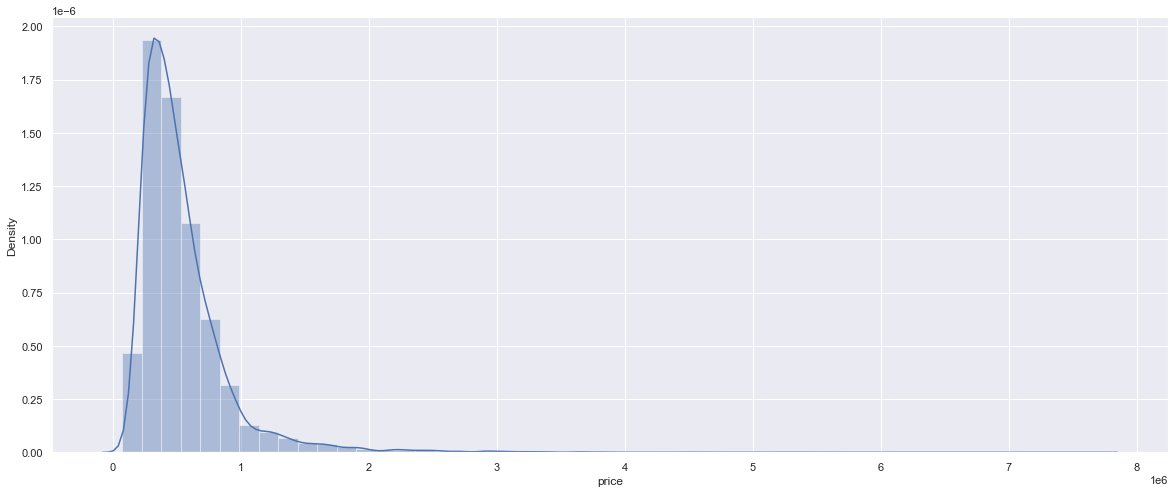

In [11]:
# Visualize data distribution by price
sns.distplot( df1['price'] );

### 1.7.2. Checking Attributes

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>

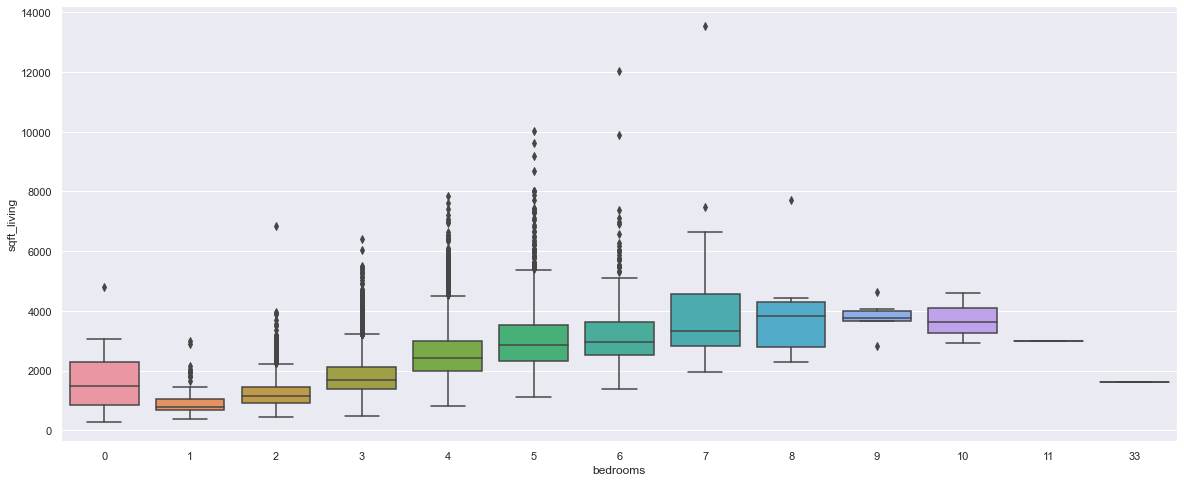

In [12]:
# Visualize number of bedrooms distribution by living area squarefeet
sns.boxplot( x='bedrooms', y='sqft_living', data=df1)

<BarContainer object of 2 artists>

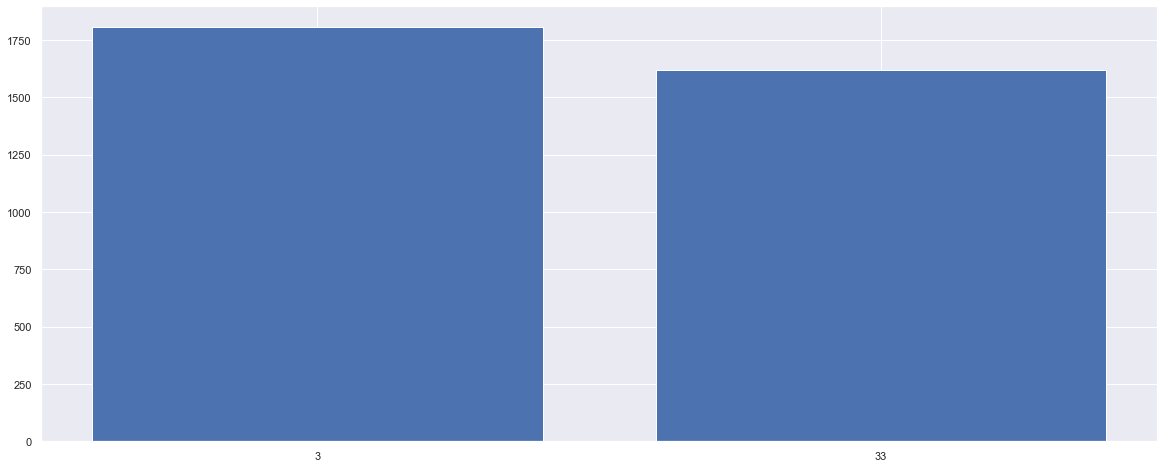

In [13]:
# Compare the mean of living area squarefeet between houses with 3 and 33 bedrooms
aux1 = df1[['bedrooms', 'sqft_living']][(df1['bedrooms'] == 3) | (df1['bedrooms'] == 33) ]
aux1 = aux1.groupby('bedrooms').mean().reset_index()
aux1['bedrooms'] = aux1['bedrooms'].astype( str )

plt.bar(aux1['bedrooms'], aux1['sqft_living'])

In [14]:
# Remove data with the number of 33 bedrooms due to error input -> 1 row
df1 = df1.drop( df1[df1.bedrooms == 33].index )

In [15]:
# Remove data with no input of number of bathrooms -> 10 rows
df1 = df1.drop( df1[df1.bathrooms == 0].index )

In [25]:
# Remove data with no input of number of bedrooms -> 6 rows
df1 = df1.drop( df1[df1.bedrooms == 0].index )

In [26]:
numerical_attributes(df1)

attributes         min            max           mean         median            std   skew  kurtosis
0              id 1000102.000 9900000190.000 4580575157.071 3904930470.000 2876697522.696  0.243    -1.261
1           price   78000.000    7700000.000     540198.299     450000.000     367133.103  4.026    34.603
2        bedrooms       1.000         11.000          3.372          3.000          0.904  0.551     1.797
3       bathrooms       0.500          8.000          2.116          2.250          0.769  0.520     1.279
4     sqft_living     370.000      13540.000       2080.343       1910.000        918.101  1.473     5.252
5        sqft_lot     520.000    1651359.000      15099.830       7619.000      41412.591 13.072   285.483
6          floors       1.000          3.500          1.494          1.500          0.540  0.614    -0.491
7      waterfront       0.000          1.000          0.008          0.000          0.087 11.381   127.528
8            view       0.000          4.000          0.234          0.000          0.766  3.396    10.895
9       condition       1.000          5.000          3.410          3.000          0.650  1.036     0.520
10          grade       3.000         13.000          7.658          7.000          1.173  0.788     1.135
11     sqft_above     370.000       9410.000       1788.632       1560.000        827.744  1.447     3.405
12  sqft_basement       0.000       4820.000        291.712          0.000        442.663  1.577     2.712
13       yr_built    1900.000       2015.000       1971.001       1975.000         29.375 -0.470    -0.658
14   yr_renovated       0.000       2015.000         84.469          0.000        401.821  4.547    18.683
15        zipcode   98001.000      98199.000      98077.951      98065.000         53.513  0.405    -0.854
16            lat      47.156         47.778         47.560         47.572          0.139 -0.485    -0.676
17           long    -122.519       -121.315       -122.214       -122.231          0.141  0.885     1.052
18  sqft_living15     399.000       6210.000       1986.651       1840.000        685.216  1.107     1.592
19     sqft_lot15     651.000     871200.000      12758.657       7620.000      27274.387  9.524   151.389

## ## Saving Dataset

In [27]:
df1.to_csv( path_or_buf= '../datasets/transformed_data.csv', index=False )